# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/classification/loan_status_data/loan_status.csv')

## Data Definitions

<ul>
<li><strong>Loan_ID</strong>: A unique loan ID.</li>
<li><strong>Gender</strong>: Either male or female.</li>
<li><strong>Married</strong>: Weather Married(yes) or Not Marttied(No).</li>
<li><strong>Dependents</strong>: Number of persons depending on the client.</li>
<li><strong>Education</strong>: Applicant Education(Graduate or Undergraduate).</li>
<li><strong>Self_Employed</strong>: Self-employed (Yes/No).</li>
<li><strong>ApplicantIncome</strong>: Applicant income.</li>
<li><strong>CoapplicantIncome</strong>: Co-applicant income.</li>
<li><strong>LoanAmount</strong>: Loan amount in thousands.</li>
<li><strong>Loan_Amount_Term</strong>: Terms of the loan in months.</li>
<li><strong>Credit_History</strong>: Credit history meets guidelines.</li>
<li><strong>Property_Area</strong>: Applicants are living either Urban, Semi-Urban or Rural.</li>
<li><strong>Loan_Status</strong>: Loan approved (Y/N).</li>
</ul>

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


# Question 1
- Any data quality issues/concerns?
- Any clean up needed?

Here I have observed that whenever we want to handle missing values we have to follow these process by imputation in which examples using mean, median, or mode or deletion depending on the significance of the variable and the amount of missing data and i have observed that there is no missing data is present and here we have seen there are 0 duplicate rows we kn ow with the help of loan id we can able to identify the data but here you can see there are o by the given code:

Number of duplicate rows: 0
Number of outliers in ApplicantIncome: 4


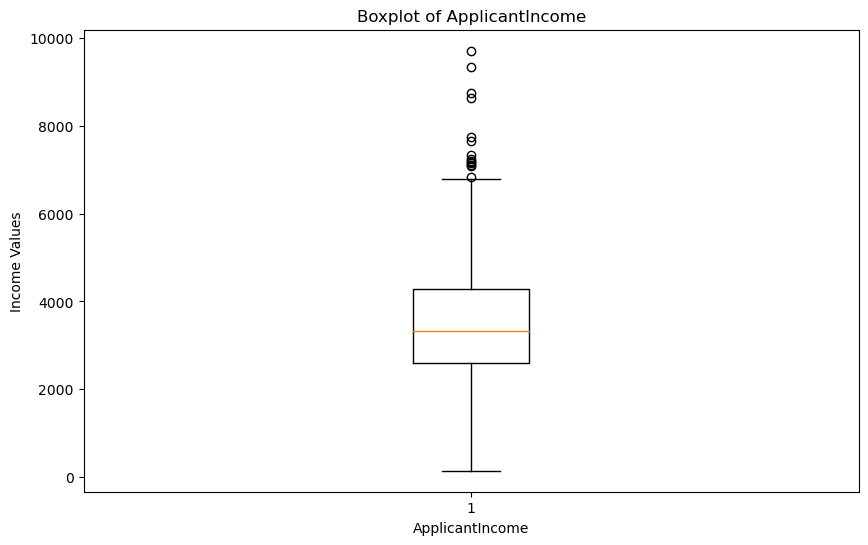

In [5]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check for outliers
from scipy import stats
import matplotlib.pyplot as plt

# Example: Check for outliers in ApplicantIncome
z = np.abs(stats.zscore(df['ApplicantIncome']))
print(f"Number of outliers in ApplicantIncome: {(z > 3).sum()}")

# Plot boxplot to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['ApplicantIncome'])
plt.title('Boxplot of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Income Values')
plt.show()

# Encode categorical data
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [6]:

print(df.info())

print(df.describe())


categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    print(col)
    print(df[col].value_counts())


numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    print(col)
    print(df[col].describe())

print("Duplicate Loan IDs:", df.duplicated('Loan_ID').sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 38.8+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       381.000000         3

In [7]:

print(df['Credit_History'].value_counts())
print(df['Dependents'].value_counts())


Credit_History
1.0    294
0.0     57
Name: count, dtype: int64
Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64


In [8]:
# Recheck for missing values after cleanup
print(df.isnull().sum())

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
# Recheck data types after cleanup
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


# Question 2
- What is the distribution of the target (`Loan_Status`)?  
- Do you have any concerns on class imbalances?

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


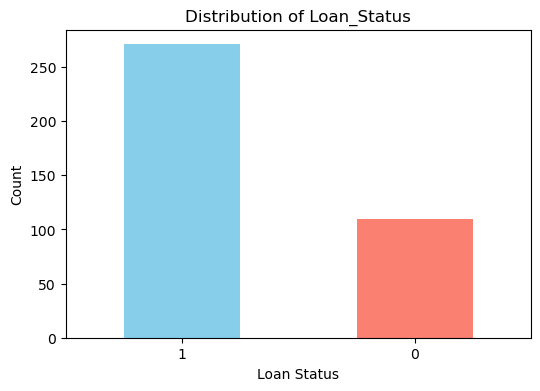

Class Imbalance Ratio (Y/N): 2.463636363636364


In [11]:
status_counts = df['Loan_Status'].value_counts()
plt.figure(figsize=(6, 4))
status_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

class_imbalance = status_counts[1] / status_counts[0]
print("Class Imbalance Ratio (Y/N):", class_imbalance)


Insert comments here

# Question 3
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [12]:
numerical_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_vars = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

print("Numerical Variables:")
print("-" * 20)
for var in numerical_vars:
    print(f"{var}: Represents a numerical value, suitable for mathematical operations.")

print("\n")

print("Categorical Variables:")
print("-" * 20)
for var in categorical_vars:
    print(f"{var}: Represents a categorical variable with distinct categories.")


Numerical Variables:
--------------------
ApplicantIncome: Represents a numerical value, suitable for mathematical operations.
CoapplicantIncome: Represents a numerical value, suitable for mathematical operations.
LoanAmount: Represents a numerical value, suitable for mathematical operations.
Loan_Amount_Term: Represents a numerical value, suitable for mathematical operations.


Categorical Variables:
--------------------
Loan_ID: Represents a categorical variable with distinct categories.
Gender: Represents a categorical variable with distinct categories.
Married: Represents a categorical variable with distinct categories.
Dependents: Represents a categorical variable with distinct categories.
Education: Represents a categorical variable with distinct categories.
Self_Employed: Represents a categorical variable with distinct categories.
Credit_History: Represents a categorical variable with distinct categories.
Property_Area: Represents a categorical variable with distinct categories.

Insert comments here

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 120.  

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120, stratify=y)

# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [14]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Verify pipelines
X_train_transformed_numerical = numerical_pipeline.fit_transform(X_train[numerical_vars])
X_train_transformed_categorical = categorical_pipeline.fit_transform(X_train[categorical_vars])

print("\nShape of transformed numerical data:", X_train_transformed_numerical.shape)
print("Shape of transformed categorical data:", X_train_transformed_categorical.shape)


Shape of transformed numerical data: (304, 4)
Shape of transformed categorical data: (304, 321)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [15]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_vars),
    ('categorical', categorical_pipeline, categorical_vars)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("\nAccuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)




Accuracy on training set: 0.8618421052631579
Accuracy on test set: 0.8441558441558441


# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

In [16]:
""" According to my point when the model needs to be developed and evaluated by explore and create new features from existing ones that may provide more predictive power to the model.
Investigate interactions between features and consider including them in the model.
Encode categorical variables using techniques such as one-hot encoding or label encoding to represent them effectively in the model.

Another way is to try to experiment with diferent models and we know in machine learning we have models like logistic regression, decision trees, random forests, gradient boosting, support vector machines, or neural networks.
Use it wisely to get good accuracy,prediction, and
Evaluate the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, F1-score
If there is a significant class imbalance, employ techniques such as oversampling, undersampling, or using algorithms designed to handle imbalanced data and to mitigate the issue and improve model performance.
Ensure the model is interpretable and can provide insights into the factors driving predictions, especially in domains where interpretability is crucial. """

" According to my point when the model needs to be developed and evaluated by explore and create new features from existing ones that may provide more predictive power to the model.\nInvestigate interactions between features and consider including them in the model.\nEncode categorical variables using techniques such as one-hot encoding or label encoding to represent them effectively in the model.\n\nAnother way is to try to experiment with diferent models and we know in machine learning we have models like logistic regression, decision trees, random forests, gradient boosting, support vector machines, or neural networks.\nUse it wisely to get good accuracy,prediction, and\nEvaluate the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, F1-score\nIf there is a significant class imbalance, employ techniques such as oversampling, undersampling, or using algorithms designed to handle imbalanced data and to mitigate the issue and improve model per